# Filtering data

This pipeline is for manually checking and removing bad trials, where the markers are out-of-sight or the position that are not possible. 

The idea is to remove completely the trials for which there is no data to keep and to infer the positions when there is only a few samples which are considered outliers. 

In [1]:
import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from src.helpers import *
from src.visualize import *

/home/nerea/anaconda3/envs/sinthlab/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
date = '0504'
fold = 0

In [3]:
data_path = './Data/Processed_Data/Tidy_Sansa_0504.pkl'

with open(data_path, 'rb') as file:
    tidy_df = pickle.load(file)
    

In [4]:
variable = 0
end_ = -1

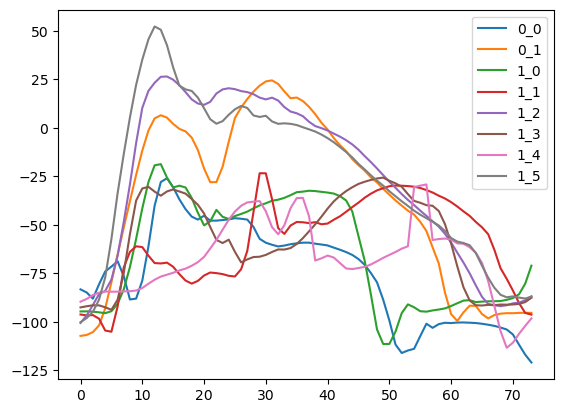

In [5]:
for id in tidy_df.id.unique()[:8]:
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[:end_,variable]
    plt.plot(trial, label = id)
plt.legend()
plt.show()

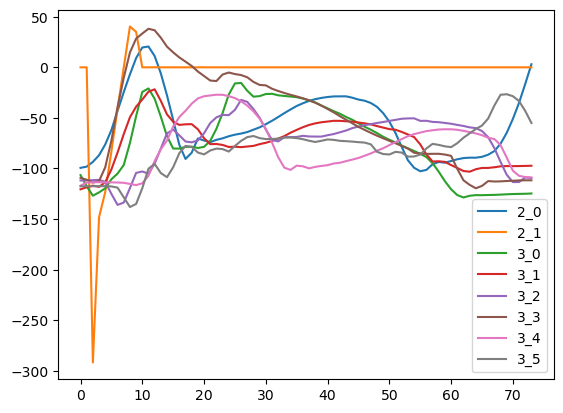

In [6]:
for id in tidy_df.id.unique()[8:16]:
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[:end_,variable]
    plt.plot(trial, label = id)
plt.legend()
plt.show()

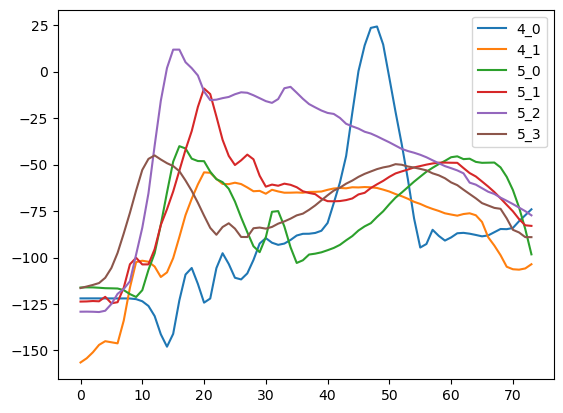

In [7]:
for id in tidy_df.id.unique()[16:22]:
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[:end_,variable]
    plt.plot(trial, label = id)
plt.legend()
plt.show()

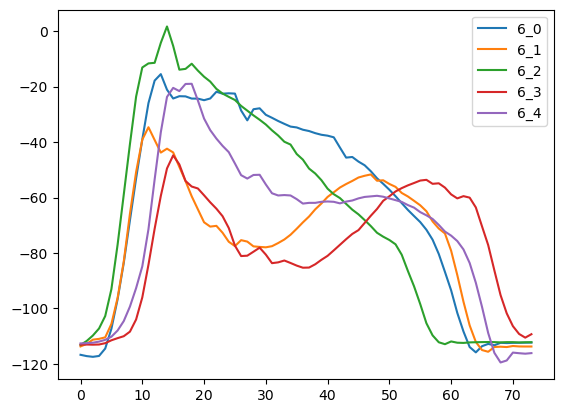

In [8]:
for id in tidy_df.id.unique()[22:27]:
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[:end_,variable]
    plt.plot(trial, label = id)
plt.legend()
plt.show()

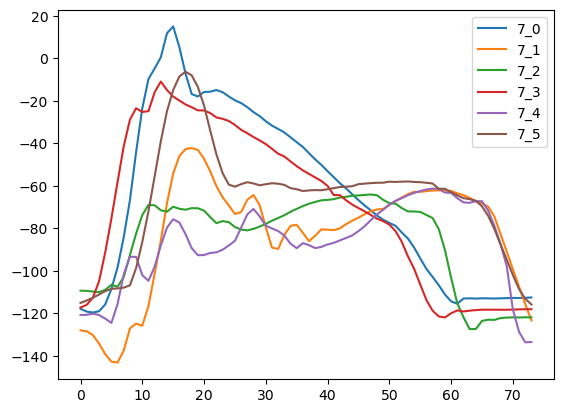

In [9]:
for id in tidy_df.id.unique()[27:33]:
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[:end_,variable]
    plt.plot(trial, label = id)
plt.legend()
plt.show()

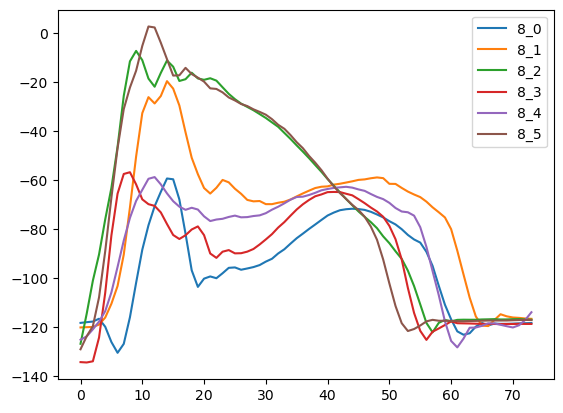

In [10]:
for id in tidy_df.id.unique()[33:39]:
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[:end_,variable]
    plt.plot(trial, label = id)
plt.legend()
plt.show()

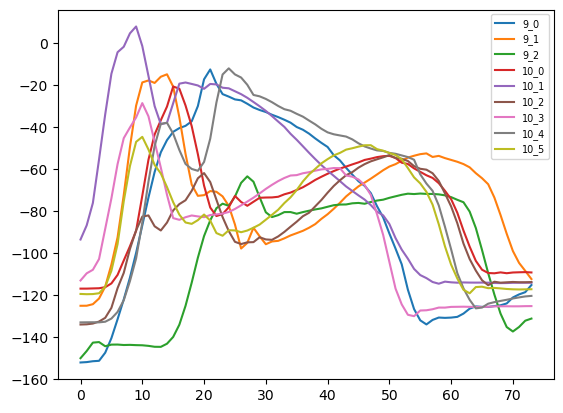

In [11]:
for id in tidy_df.id.unique()[39:48]:
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[:end_,variable]
    plt.plot(trial, label = id)
plt.legend(fontsize = 'x-small')
plt.show()

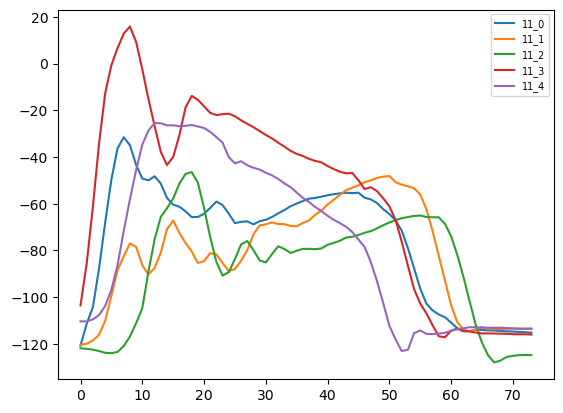

In [12]:
for id in tidy_df.id.unique()[48:53]:
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[:end_,variable]
    plt.plot(trial, label = id)
plt.legend(fontsize = 'x-small')
plt.show()

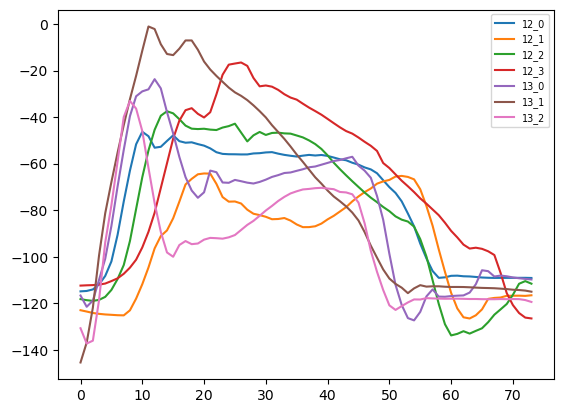

In [13]:
for id in tidy_df.id.unique()[53:60]:
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[:end_,variable]
    plt.plot(trial, label = id)
plt.legend(fontsize = 'x-small')
plt.show()

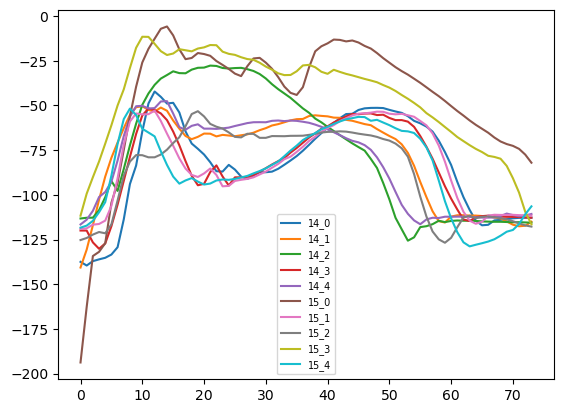

In [14]:
for id in tidy_df.id.unique()[60:70]:
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[:end_,variable]
    plt.plot(trial, label = id)
plt.legend(fontsize = 'x-small')
plt.show()

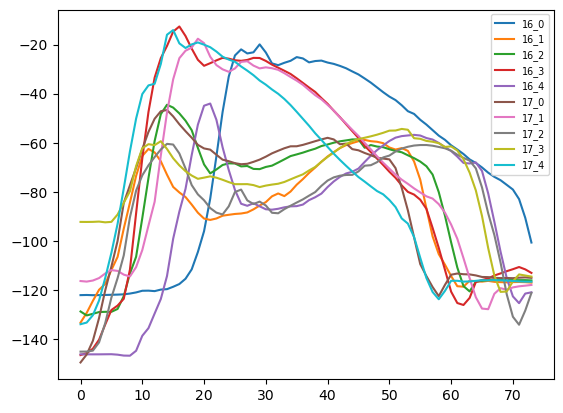

In [15]:
for id in tidy_df.id.unique()[70:80]:
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[:end_,variable]
    plt.plot(trial, label = id)
plt.legend(fontsize = 'x-small')
plt.show()

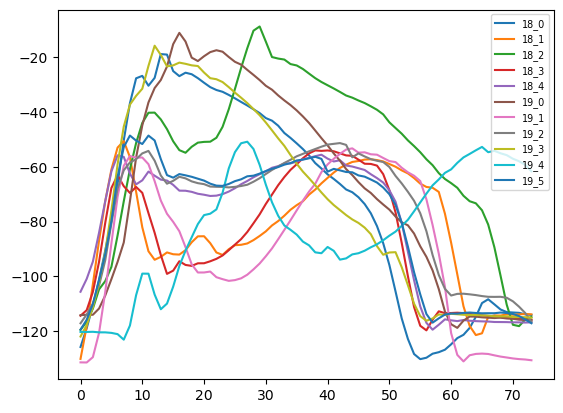

In [16]:
for id in tidy_df.id.unique()[80:91]:
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[:end_,variable]
    plt.plot(trial, label = id)
plt.legend(fontsize = 'x-small')
plt.show()

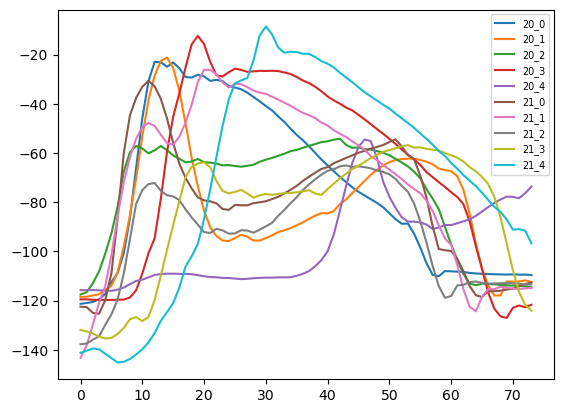

In [17]:
for id in tidy_df.id.unique()[91:101]:
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[:end_,variable]
    plt.plot(trial, label = id)
plt.legend(fontsize = 'x-small')
plt.show()

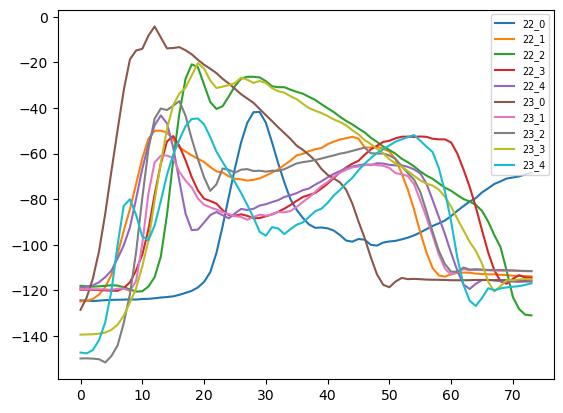

In [18]:
for id in tidy_df.id.unique()[101:111]:
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[:end_,variable]
    plt.plot(trial, label = id)
plt.legend(fontsize = 'x-small')
plt.show()

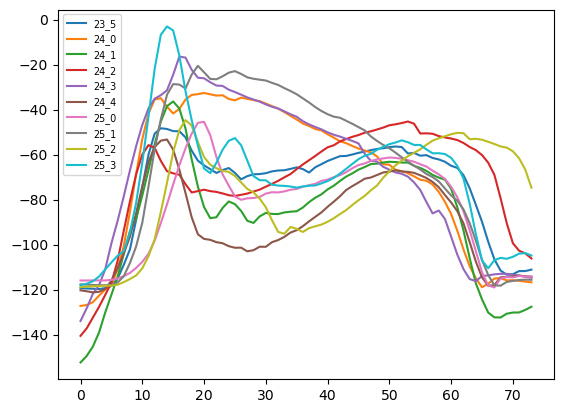

In [19]:
for id in tidy_df.id.unique()[111:121]:
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[:end_,variable]
    plt.plot(trial, label = id)
plt.legend(fontsize = 'x-small')
plt.show()

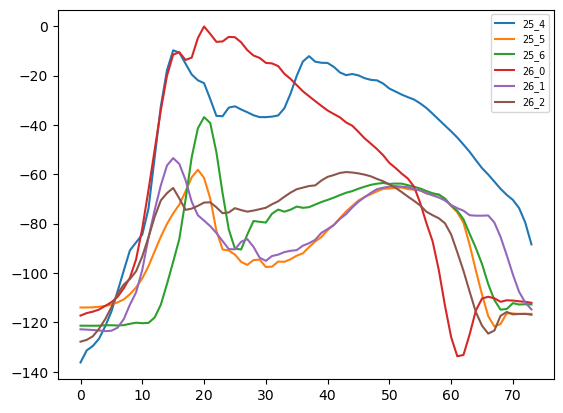

In [20]:
for id in tidy_df.id.unique()[121:127]:
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[:end_,variable]
    plt.plot(trial, label = id)
plt.legend(fontsize = 'x-small')
plt.show()

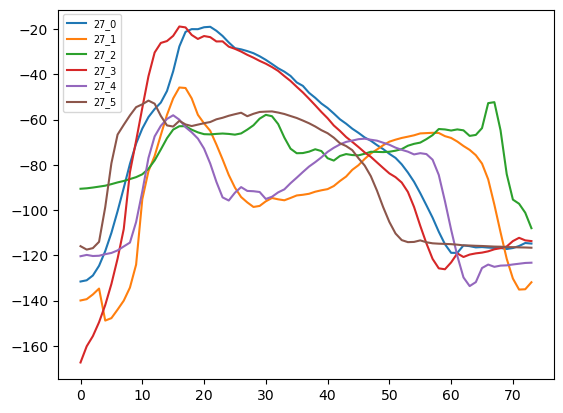

In [21]:
for id in tidy_df.id.unique()[127:134]:
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[:end_,variable]
    plt.plot(trial, label = id)
plt.legend(fontsize = 'x-small')
plt.show()

### Ideas to try:

- Baseline subtraction methods: try to compute the median and standard deviation of the median and from there detect which trials are unstable at the beginning.
- Second derivative histogram : see for which trials the tail has a bump (there are unusual peaks in the data) and discard or correct them.
- Correlation methods: use a trial or the mean between some apparently good trials and then compute correlation between this template trials and all the rest. Empirically decide which is a good threshold to have an eccepted / rejected trial.

### A) Baseline method

Most of the trials have only 1 or 2 values which are completely outliers, the beginning is unstable, but the rest is good. 

Some other trials have many samples which are considered outliers, errors in the measurements. 

The we could use then the following approach:

- for the trials with only 2/3 values outside of range we use the following values to pad the first values.

- for the trials with too many outliers we just remove them from the dataset. 
    
- then we can use baseline substraction to put all trials to begin at 0.

In [22]:
baseline_means = []

for id in tidy_df.id.unique():
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[:3,:]
    baseline_means.append(trial.mean(axis = 0))

In [23]:
np.median(baseline_means, axis = 0)

array([-118.90580241,  254.18718211,  190.90696208])

In [24]:
np.std(baseline_means, axis = 0)

array([14.81716418, 31.45048619, 16.74980769])

In [25]:
sup_thrs = np.median(baseline_means, axis = 0) + 3*np.std(baseline_means, axis = 0)
inf_thrs = np.median(baseline_means, axis = 0) - 3*np.std(baseline_means, axis = 0)

In [26]:
sup_thrs

array([-74.45430986, 348.53864069, 241.15638513])

In [27]:
inf_thrs

array([-163.35729496,  159.83572353,  140.65753902])

In [28]:
potential_wrongs_start = []

for i in range(len(sup_thrs)):
    potential_wrong_i = []
    for id in tidy_df.id.unique():
        trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[:2,:]
        if (trial.mean(axis = 0)[i] > sup_thrs[i]) or (trial.mean(axis = 0)[i] < inf_thrs[i]):
            potential_wrong_i.append(id)
    potential_wrongs_start.append(potential_wrong_i)

In [29]:
potential_wrongs = potential_wrongs_start

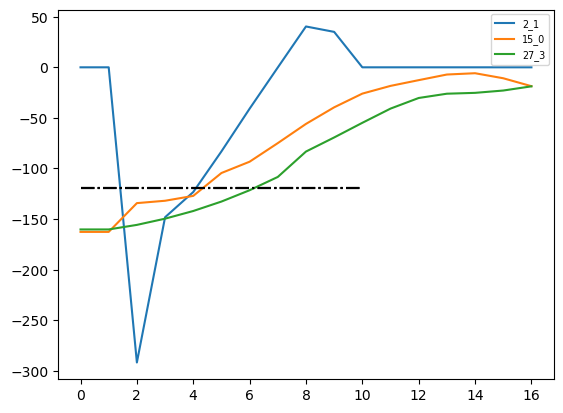

In [30]:
for id in potential_wrongs[0]:
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[1:17,0]
    padding = np.full(1, np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[1,0]) 
    trial_new = np.concatenate((padding, trial))
    plt.plot(trial_new, label = id)
    plt.hlines(y = np.median(baseline_means, axis = 0)[0], xmin = 0, xmax = 10, linestyles= 'dashdot', colors = 'k')
    
plt.legend(fontsize = 'x-small')
plt.show()

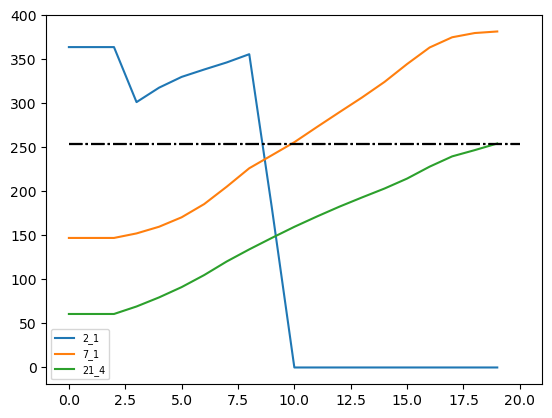

In [31]:
for id in potential_wrongs[1]:
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[2:20,1]
    padding = np.full(2, np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[2,1]) 
    trial_new = np.concatenate((padding, trial))
    plt.plot(trial_new, label = id)
    plt.hlines(y = np.median(baseline_means, axis = 0)[1], xmin = 0, xmax = 20, linestyles= 'dashdot', colors = 'k')


plt.legend(fontsize = 'x-small')
plt.show()

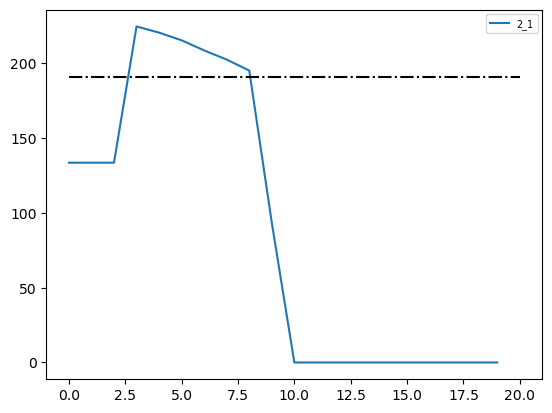

In [32]:
for id in potential_wrongs[2]:
    trial = np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[2:20,2]
    padding = np.full(2, np.vstack(tidy_df.loc[tidy_df['id']==id]['target_pos'])[2,2]) 
    trial_new = np.concatenate((padding, trial))
    plt.plot(trial_new, label = id)
    plt.hlines(y = np.median(baseline_means, axis = 0)[2], xmin = 0, xmax = 20, linestyles= 'dashdot', colors = 'k')


plt.legend(fontsize = 'x-small')
plt.show()

`Idea` (deprecated) : trying to fit a function (sigmoid or exponential) to the beggining of the curve to then infer the values for the first samples. The shapes of the curves vary too much from one another so this idea for now is abandoned. 

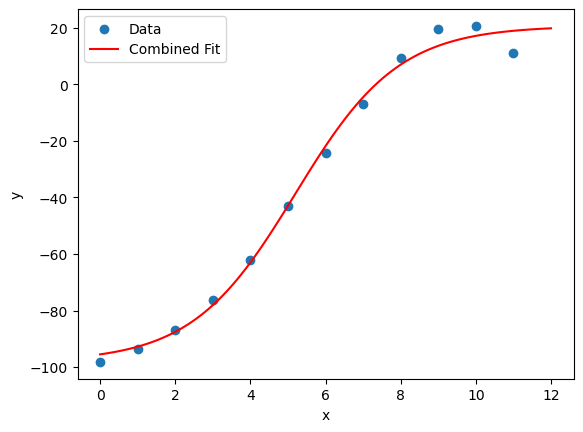

In [33]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the combined exponential and constant function
def combined_func(x, a, b, c, d):
    
    decay = b * np.exp(+x / c) + a
    return decay

# Data

""" y_data = np.array([-106.80836868, -106.80836868 ,-106.80836868 ,-106.80836868 ,-106.80836868,
 -106.80836868, -105.36054611 ,-101.88385391  ,-93.10306168 , -79.59994507,
  -65.46599388 , -51.45885086  ,-37.78046989  ,-24.28302574,  -11.72640371,
   -1.34164304  ,  4.90977144])#,6.5, 7.1, 7.5]) """
# -98.16765594 ,-98.16765594 ,-98.16765594 ,-98.16765594, -98.16765594,
y_data = np.array([
 -98.16765594, -93.47956467, -86.89585495, -76.26418304, -62.00212288,
 -43.01187897, -24.44643307  ,-6.97616673 ,  9.0763464   ,19.56755638,
  20.57799816 , 11.15408635])

a = np.max(y_data) - np.min(y_data)
d = np.min(y_data)
x_data = np.arange(len(y_data))


def sigmoid(x, b, c):
    return a / (1 + np.exp(-b * (x - c))) + d


# Fit the combined function to the data
popt, pcov = curve_fit(sigmoid, x_data, y_data)

# Extracting parameters
b, c= popt

# Generate fitted curve
x_fit = np.linspace(0, len(y_data), 100)
y_fit = sigmoid(x_fit, b, c)

# Plotting
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Combined Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



`Conclusion Baseline Methods` When changing the margin between the reach index and the start of the trial (putting it to only 2 samples before the reach index instead of 5), most of the instability at the beginning of the signals is gone.

The only trials to filter out / modify are:
- Trial 2_1 --> Remove from data
- Trials 15_0 and 27_3 --> change only the first value (pad it using the next one)

Another idea to continue cleaning the data would be to subtract the first value to all trials, so that the model learns the movement and not so much the exact position (for which I imagine most shifts are induced by movement in cameras or markers)

A) Filtering out trial 2_1

In [34]:
tidy_df_filt = tidy_df.loc[~(tidy_df.id == '2_1')].reset_index()

B) Changing the first value for trials 15_0 and 27_3

In [35]:
# Find the index of the row where you want to change the value
index_to_change_1 = tidy_df_filt.index[tidy_df_filt['id'] == '15_0'][0]
index_to_change_2 = tidy_df_filt.index[tidy_df_filt['id'] == '27_3'][0]


# Column name where the value needs to be changed
column_to_change = 'target_pos'

# New value to be assigned
new_value_1 = tidy_df_filt.loc[tidy_df_filt['id'] == '15_0', 'target_pos'].iloc[1]
new_value_2 = tidy_df_filt.loc[tidy_df_filt['id'] == '27_3', 'target_pos'].iloc[1]

# Update the value in the DataFrame
tidy_df_filt.at[index_to_change_1, column_to_change] = new_value_1
tidy_df_filt.at[index_to_change_2, column_to_change] = new_value_2

In [36]:
# Function to subtract the first value from each group
# Function to subtract the first value from each group
def subtract_first_value(x):
    first_value = x.iloc[0]
    return x.apply(lambda val: np.array(val) - np.array(first_value))
tidy_df_filt['target_pos_nobase'] = tidy_df_filt.groupby('id')['target_pos'].transform(subtract_first_value)

In [37]:
tidy_df_filt['target_pos_nobase']

0                                         [0.0, 0.0, 0.0]
1       [-1.5958747863769531, -0.58770751953125, 0.488...
2       [-4.761863708496094, 1.5389556884765625, 2.193...
3       [2.6166305541992188, 2.37371826171875, -1.4153...
4       [9.255565643310547, 4.9423675537109375, -7.313...
                              ...                        
9895    [-0.43215179443359375, -1.2208099365234375, -5...
9896    [-0.5328330993652344, -1.1539535522460938, -6....
9897    [-0.5812721252441406, -1.165618896484375, -6.4...
9898    [-0.68682861328125, -1.1844024658203125, -6.78...
9899    [-0.7362556457519531, -1.1501922607421875, -6....
Name: target_pos_nobase, Length: 9900, dtype: object

In [38]:
variable = 1

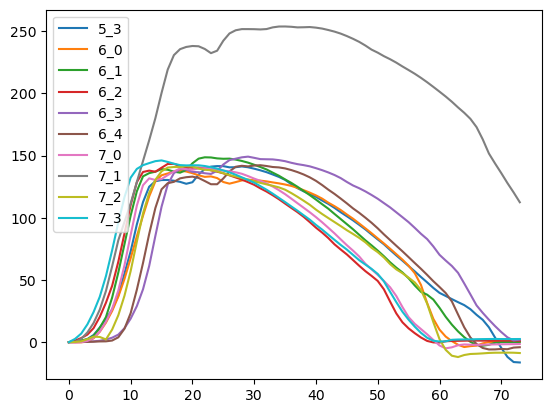

In [39]:
for id in tidy_df_filt.id.unique()[20:30]:
    trial = np.vstack(tidy_df_filt.loc[tidy_df_filt['id']==id]['target_pos_nobase'])[:end_,variable]
    plt.plot(trial, label = id)
plt.legend()
plt.show()

`Problem detected` If we decide to go for the baseline correction, we get the trial 7_1 really out of range, whereas if we just leave the values as they are now we get a trial which only differs from the others in the very beginning. 

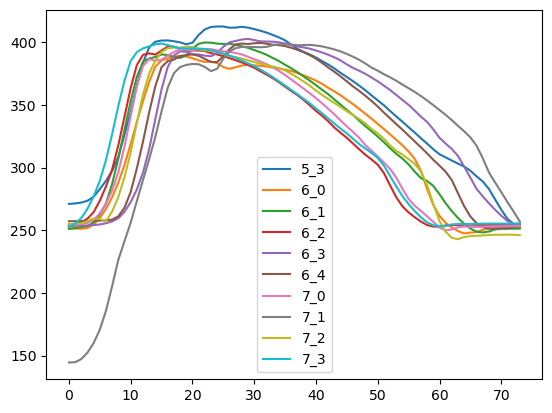

In [40]:
for id in tidy_df_filt.id.unique()[20:30]:
    trial = np.vstack(tidy_df_filt.loc[tidy_df_filt['id']==id]['target_pos'])[:end_,variable]
    plt.plot(trial, label = id)
plt.legend()
plt.show()

For this reason, the final data to use should be the target_pos with some modifications (filtered trials) but we should not change the baseline. I feel that for this problem, - where there is not a reaction that starts with time but just a monkey that moves and the reach value which is set manually to indicate the beginning of movement-, we can not really talk about a proper "baseline", as not all trials have one.

For the future we could maybe use the velocity threshold or something to define the beginning of real movement but for now we will keep it simple and be based on the reach index.

### Next Step: Computing Velocity Trajectories

In [41]:
from scipy.signal import butter, sosfilt, sosfreqz, filtfilt, TransferFunction, lsim, find_peaks

In [42]:
trial = '5_3'

In [43]:
test_trial = np.vstack(tidy_df_filt.loc[tidy_df_filt['id']==trial]['target_pos'])[:,variable]

In [44]:
b, a = butter(2, 0.250, analog=False)
data_smooth = filtfilt(b, a, test_trial, method='pad')

In [45]:
vel_test = np.gradient(data_smooth, 0.02)/10
vel_test2 = np.gradient(test_trial, 0.02) /10

In [46]:
value = np.mean(test_trial)

In [47]:
value

349.40739776611326

In [48]:
b, a = butter(2, 0.250, analog=False)
vel_smooth = filtfilt(b, a, vel_test2, method='pad')

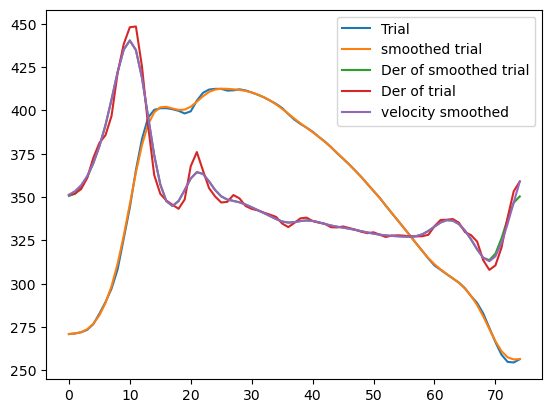

In [49]:
plt.plot(test_trial, label = 'Trial')
plt.plot(data_smooth, label = 'smoothed trial')
plt.plot((vel_test)+value, label = 'Der of smoothed trial')
plt.plot((vel_test2)+value, label = 'Der of trial')
plt.plot(vel_smooth+value, label = 'velocity smoothed')
plt.legend()

`Conclusion` For the velocity variable, we can either smooth the position and then compute the velocity or compute directly the velocity and then smooth the signal, with equivalent results. We will for this project use the second option.

In [50]:
def derivative(data, dt = 0.02):
    """
    Calculate the derivative of data using a butterworth filter and numpy gradient.

    Args:
        data (array-like): The input data.
        dt (float, optional): Time step. Defaults to 0.001 (the time 
                                difference between datapoints in the given data)
        vel (bool, optional): Whether to scale velocity. Deprecated.

    Returns:
        array-like: The derivative of the input data.
    """
    data = np.vstack(data)
    der_data = np.zeros_like(data)
    for i in range(data.shape[1]):
        data_ = data[:,i]
        der = np.gradient(data_, dt)
        b, a = butter(2, 0.250, analog=False)
        der_data[:,i] = filtfilt(b, a, der, method='pad')/1000
    return der_data.tolist()

In [51]:
# Function to subtract the first value from each group
# Function to subtract the first value from each group

tidy_df_filt['target_vel'] = tidy_df_filt.groupby('id')['target_pos'].transform(derivative)

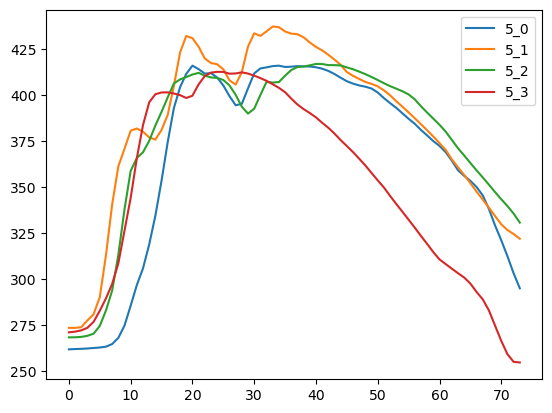

In [52]:
for id in tidy_df_filt.id.unique()[17:21]:
    trial = np.vstack(tidy_df_filt.loc[tidy_df_filt['id']==id]['target_pos'])[:end_,variable]
    
    plt.plot(trial, label = id)
plt.legend()
plt.show()

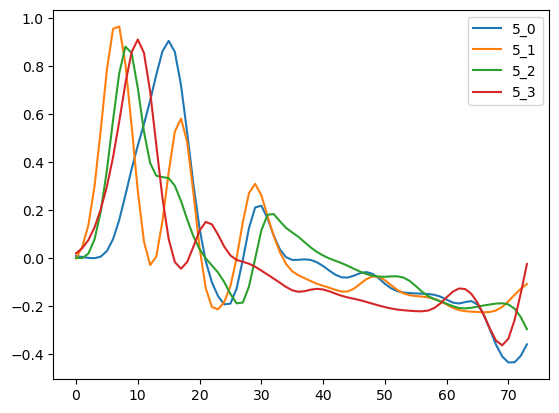

In [53]:
for id in tidy_df_filt.id.unique()[17:21]:
    trial = np.vstack(tidy_df_filt.loc[tidy_df_filt['id']==id]['target_vel'])[:end_,variable]
    
    plt.plot(trial, label = id)
plt.legend()
plt.show()

In [54]:
data_dir = "./Data"
path_to_save_data = os.path.join(data_dir, 'Processed_Data', 'Tidy_Sansa_'+str(date)+'.pkl')

# Pickle the data and save it to file
with open(path_to_save_data, 'wb') as handle:
    pickle.dump(tidy_df_filt, handle, protocol=4)